# eda

## 데이터 둘러보기

In [3]:
import pandas as pd

data_path = '../../data/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col = 'id')

In [4]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [6]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [7]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


### 피쳐 요약표 만들기

In [14]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    return summary

In [15]:
resumetable(train)

데이터셋 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


### 피처 요약표 해석하기

- 이진 : bin_0 ~ bin_4
- 명목형 : nom_0 ~ nom_9
- 순서형 : ord_0 ~ ord_5
- 그 외 : day, month, target

In [16]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_0 고윳값 : [2 1 3]
ord_1 고윳값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [17]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_3 고윳값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb

In [19]:
print('day 고윳값: ', train['day'].unique())
print('month 고윳값: ', train['month'].unique())
print('target 고윳값: ', train['target'].unique())

day 고윳값:  [2 7 5 4 3 1 6]
month 고윳값:  [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값:  [0 1]


## 데이터 시각화

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

### 타깃값 분포

In [32]:
def write_percent(ax, total_size):
    for rect in ax.patches:
        height = rect.get_height()
        percent = height/total_size*100
        plt.text(x=rect.get_x() + rect.get_width()/2.0, 
                 y=height, 
                 s=f'{percent:.1f}%', 
                 ha='center', va='bottom', size = 12)    

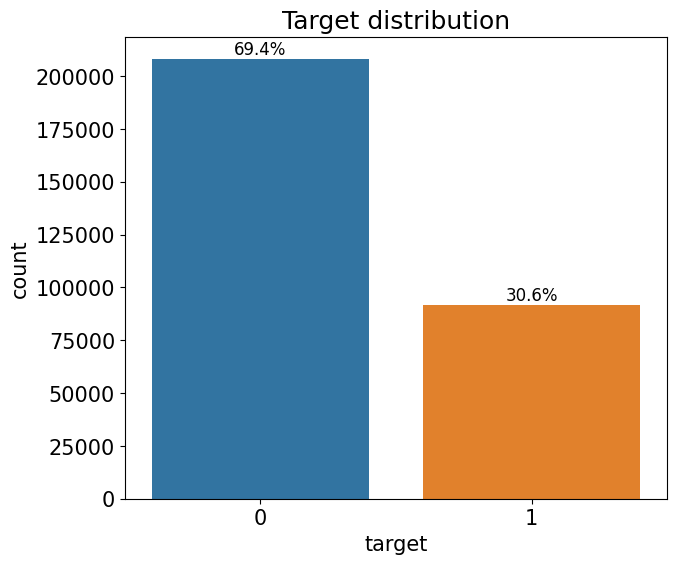

In [33]:
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target distribution');

### 이진 피처 분포

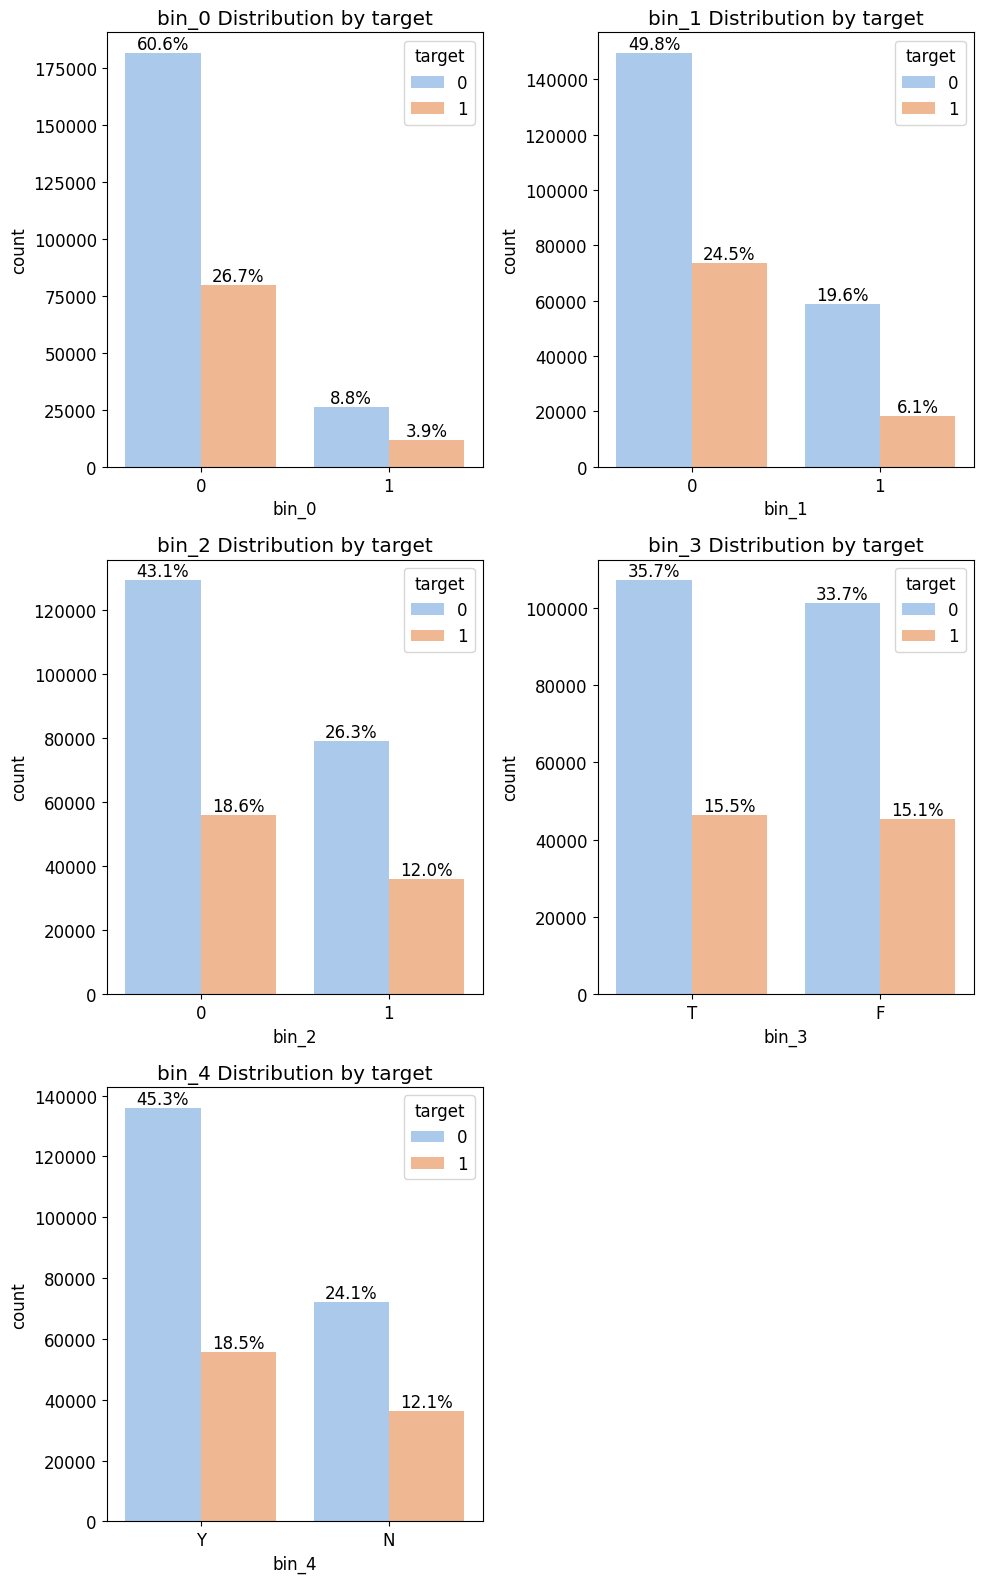

In [37]:
import matplotlib.gridspec as gridspec

mpl.rc('font', size=12)
grid = gridspec.GridSpec(3,2)
plt.figure(figsize=(10, 16))

bin_features = ['bin_' + str(x) for x in range(5)]

for idx , feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    sns.countplot(x =feature, data=train, hue='target', palette='pastel', ax=ax)
    ax.set_title(f'{feature} Distribution by target')
    write_percent(ax, len(train))
plt.tight_layout()    

### 명목형 피처 분포

#### 스탭 1 : 교차분석표 생성 함수 만들기

In [40]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [44]:
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize=True)*100
crosstab

target,0,1
nom_0,,
Blue,24.304667,7.750667
Green,28.560667,13.886333
Red,16.546667,8.951000


In [45]:
crosstab = crosstab.reset_index()
crosstab

target,nom_0,0,1
0,Blue,24.304667,7.750667
1,Green,28.560667,13.886333
2,Red,16.546667,8.951000


In [61]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

In [62]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [64]:
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

#### 스텝 2 : 포인트플롯 생성 함수 만들기

In [83]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values, color='black')
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel('Target 1 Ratio(%)')

#### 스텝 3 : 피처 분포도 및 피처별 타깃값 1의 비율 포인트 플롯 생성 함수 만들기

In [88]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15, 20)):
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        sns.countplot(x=feature, data=df,
                     order=crosstab[feature].values,
                     color='skyblue', ax=ax)
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab)
        ax.set_title(f'{feature} distribution')
        plt.tight_layout()

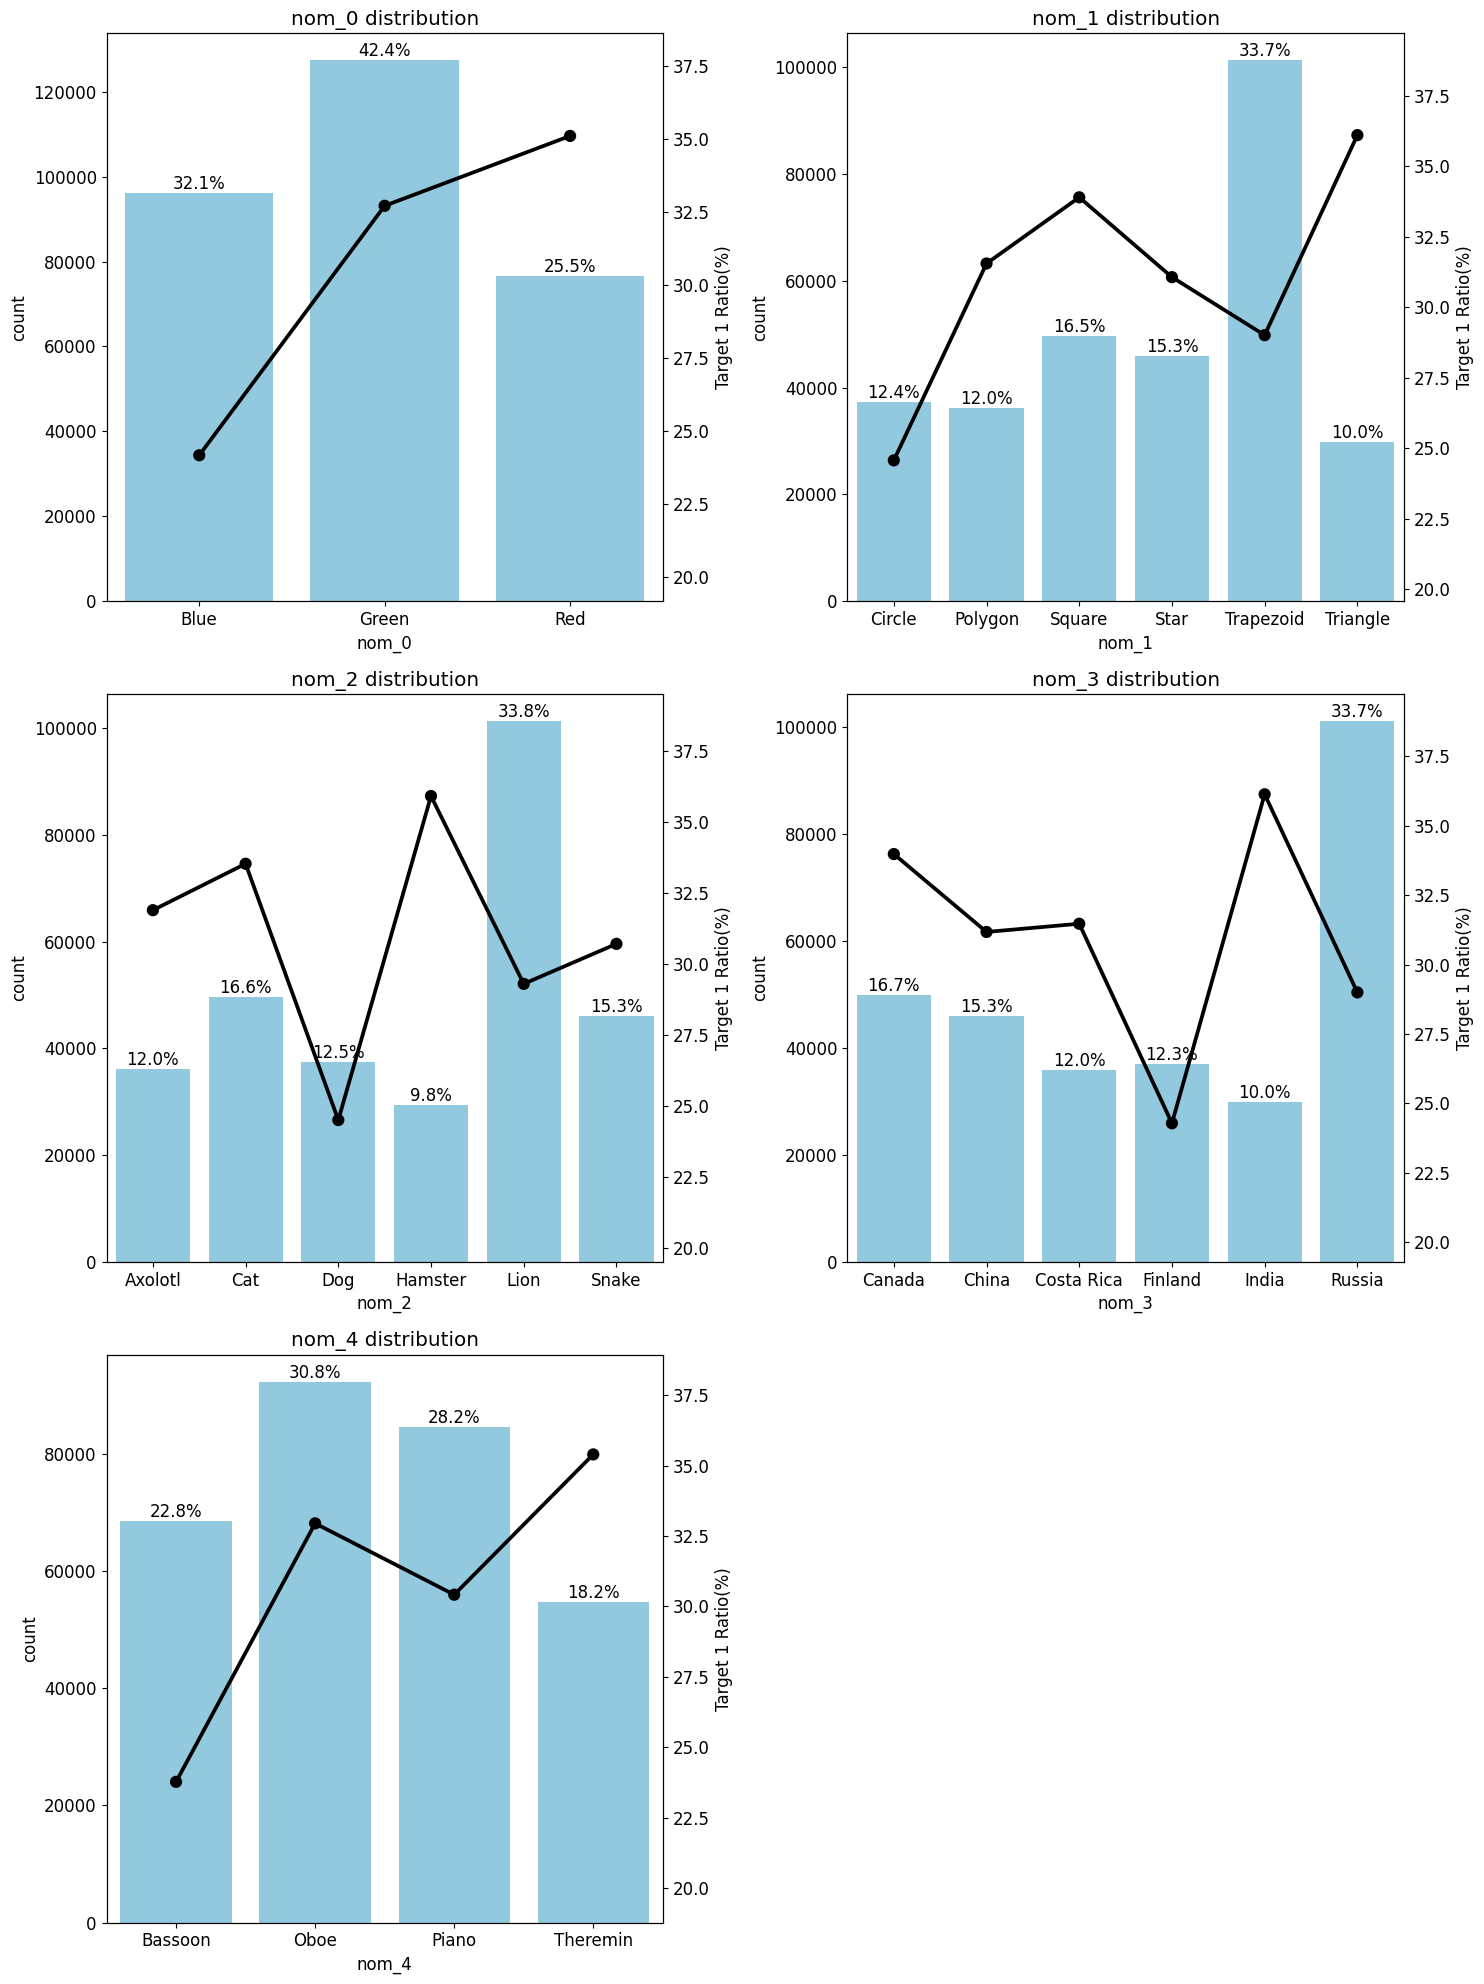

In [89]:
nom_features = ['nom_'+str(x) for x in range(5)]
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

### 순서형 피처 분포

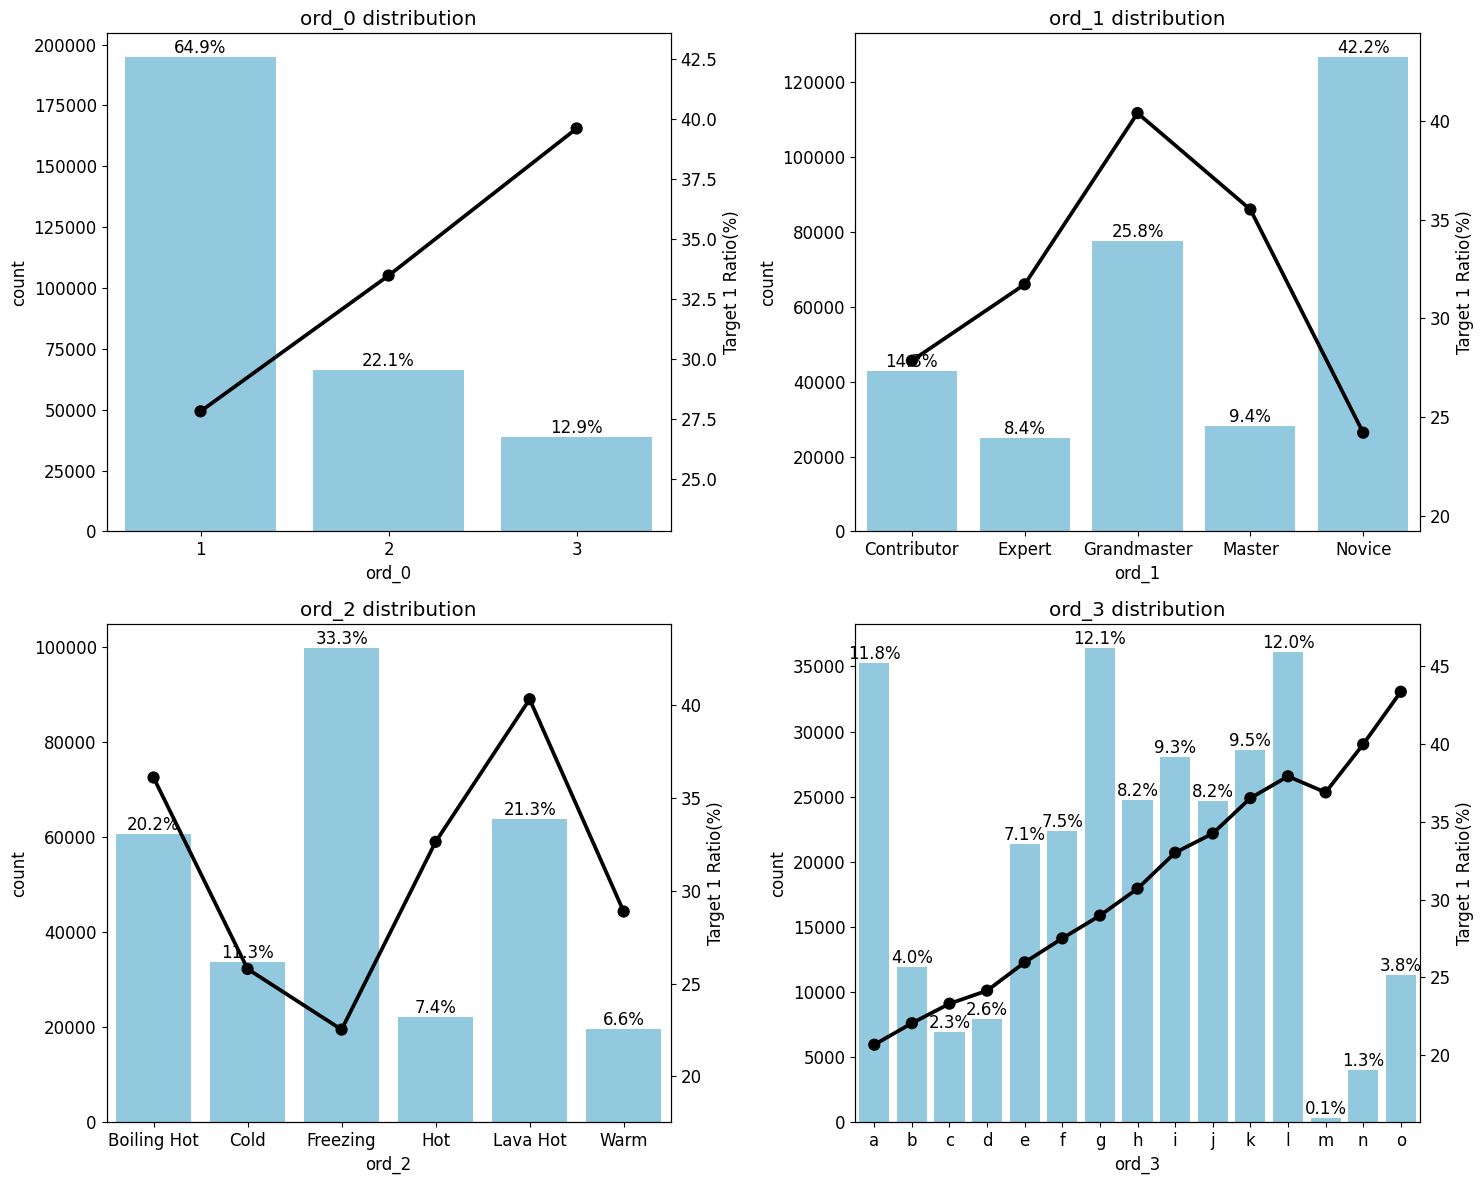

In [82]:
ord_features = ['ord_'+str(x) for x in range(4)]
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15, 12))

In [93]:
train['ord_2'].unique()

array(['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm'],
      dtype=object)

In [95]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice','Contributor','Expert','Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

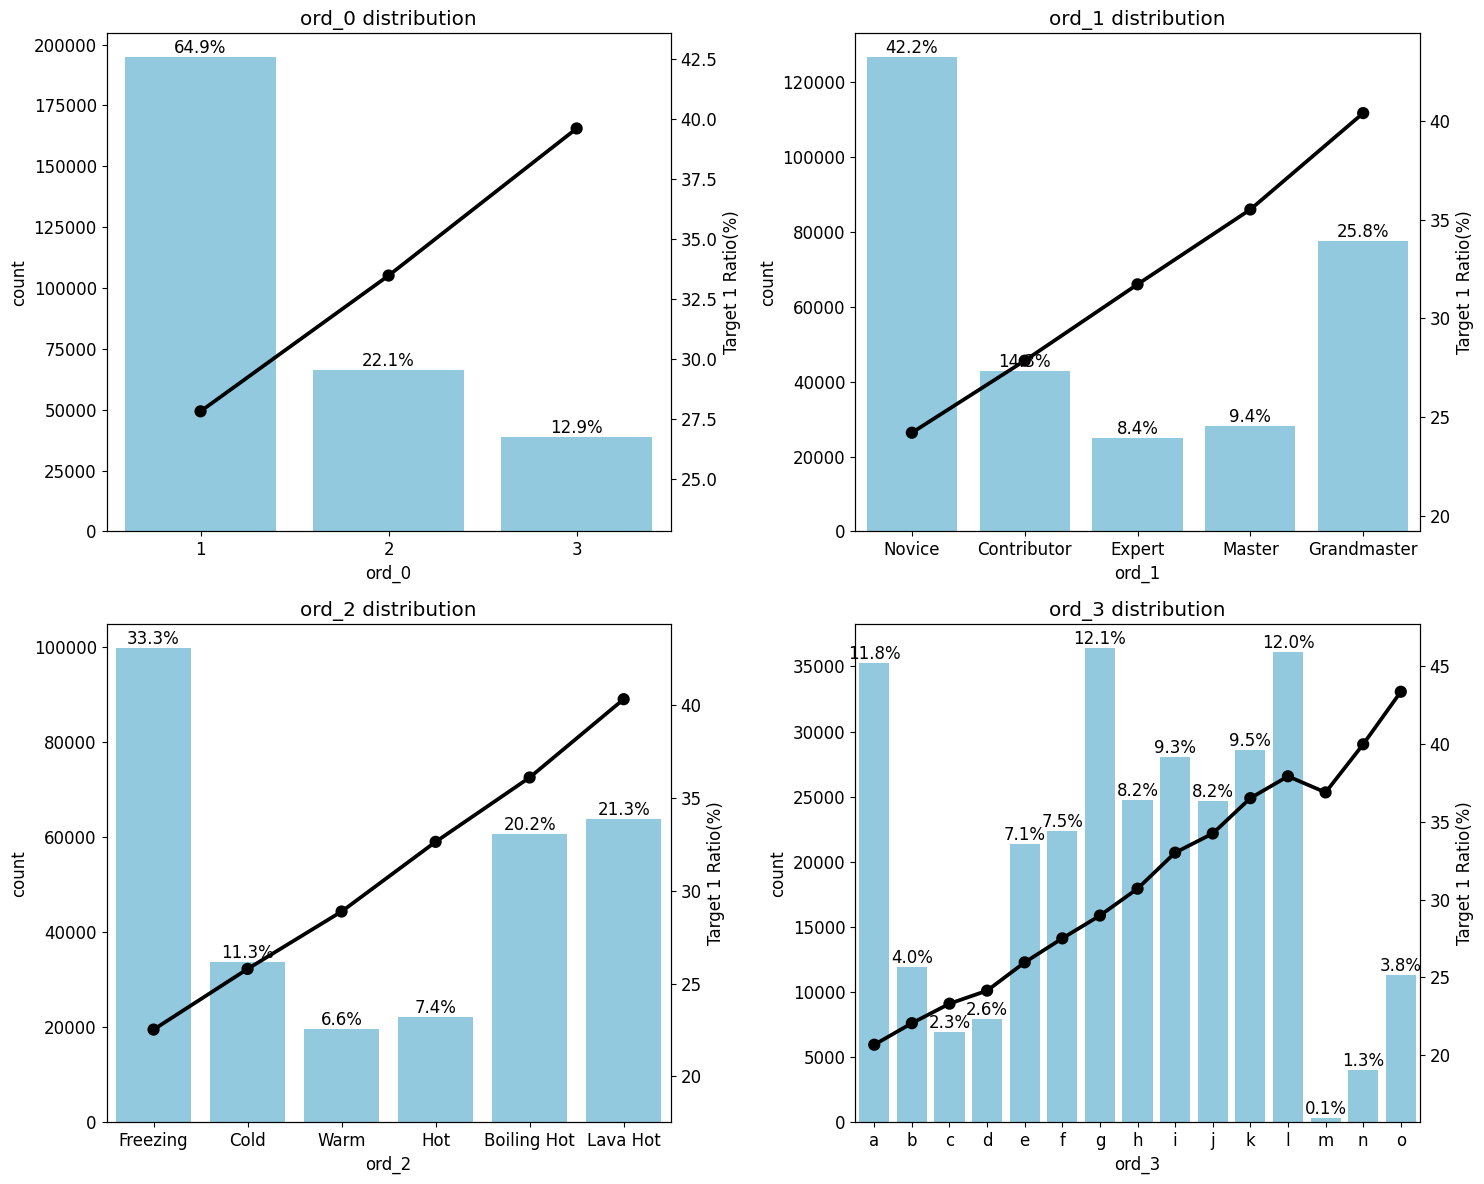

In [96]:
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15, 12))

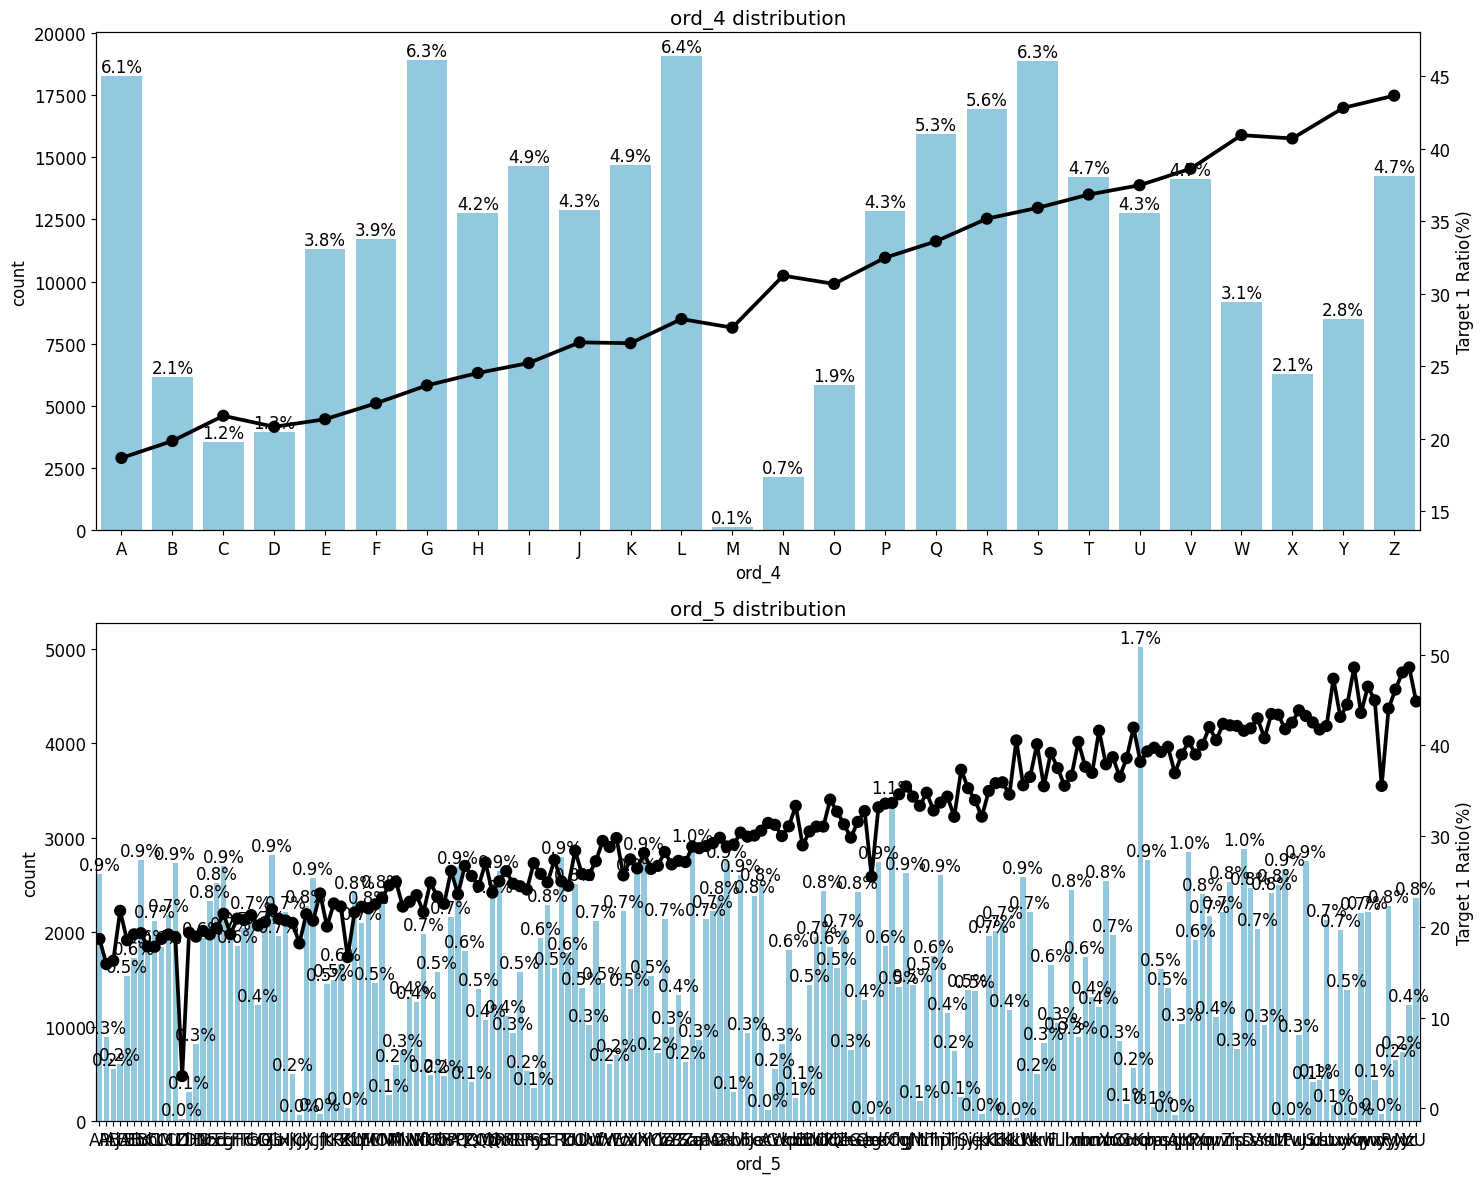

In [98]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], num_rows=2, num_cols=1, size=(15, 12))

### 날짜 피처 분포

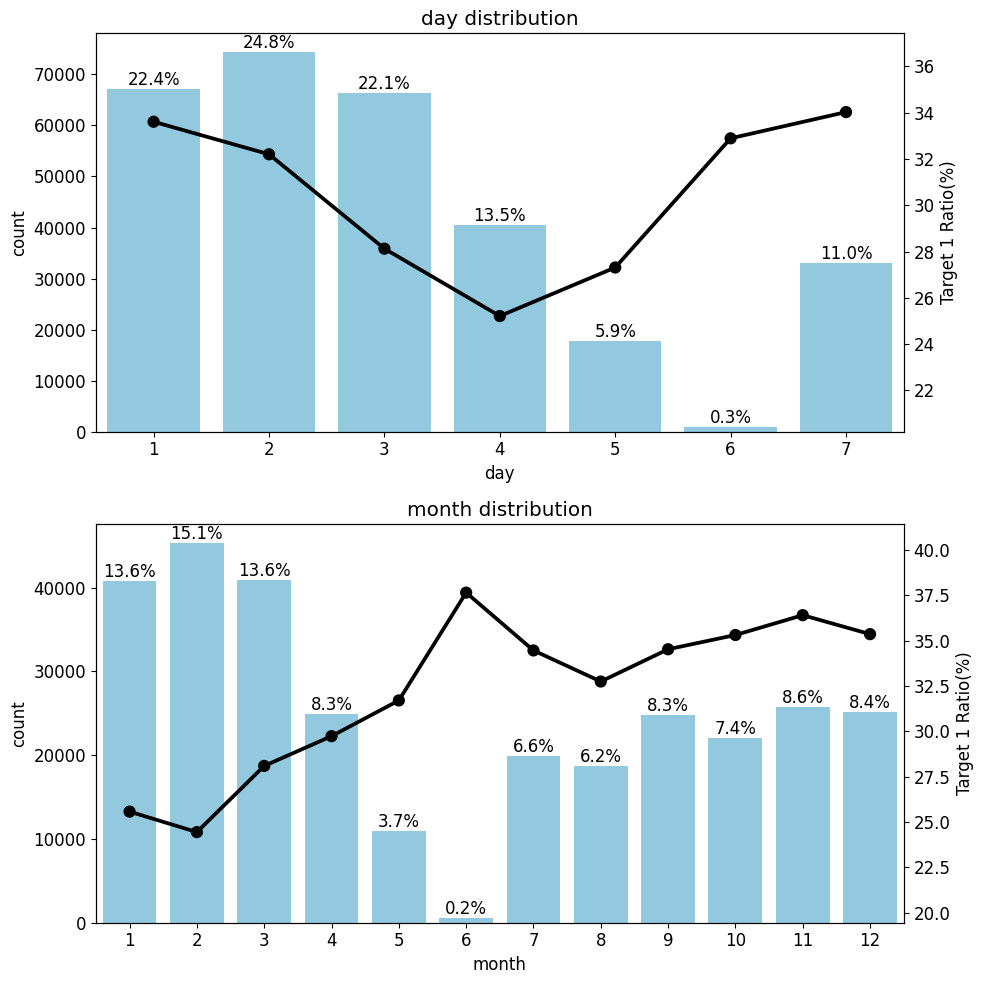

In [101]:
date_features = [ 'day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, num_rows=2, num_cols=1, size=(10, 10))

# 분석 정리 및 모델 전략

## 분석 정리
- 결측값음 없음
- 모든 피쳐가 중요
- 이진 피처 인코딩 : 숫자 값이 아닌 이진 피처는 0과 1로 인코딩
- 멍목형 피처 인코딩 : 전체 데이터가 크지 않으므로 모두 원-핫 인코딩
- 순서형 피처 인코딩 : 고윳값들의 순서에 맞게 인코딩
- 날짜 인코딩 : 원-핫 인코딩 (코사인 인코딩도?

## 모델 전략
- 베이스라인 모델 : 로지스틱 회귀
- 피처 엔지니어링 : 원-핫(코사인도?)
- 성능개선
    - 피처 엔지니어링 : 피처 맞춤 인코딩 및 스케일링
    - 하이퍼파라미터 최적화 : 그리드 서치
    - 추가 : 검증 데이터를 훈련에 이용

# 베이스라인 모델

In [115]:
import pandas as pd

data_path = '../../data/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')

## 피처 엔지니어링

### 데이터 합치기

In [116]:
all_data = pd.concat([train, test], axis=0)
all_data = all_data.drop(['target'], axis=1)
all_data.shape

(500000, 23)

### 원-핫 인코딩

In [118]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)
all_data_encoded.shape

(500000, 16552)

### 데이터 나누기

In [105]:
num_train = len(train)
X_train = all_data_encoded[:num_train]
X_test = all_data_encoded[num_train:]
y = train['target']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_valied, y_train, y_valid = train_test_split(X_train, y, test_size=0.1, stratify=y, random_state=10)

## 모델 훈련

In [107]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## 모델 성능 검증

In [110]:
y_valied_preds = logistic_model.predict_proba(X_valied)[:, 1]

In [111]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valied_preds)
print(f'검증 데이터 ROC AUC : {roc_auc: .4f}')

검증 데이터 ROC AUC :  0.7965


## 예측 및 결과 제출

In [112]:
y_preds = logistic_model.predict_proba(X_test)[:, 1]

In [113]:
submission['target'] = y_preds
submission.to_csv('submission_base1.csv')

# 성능 개선 1
- 제출 성능 : 0.80108

In [140]:
import pandas as pd

data_path = '../../data/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')

## 피처 엔지니어링 1 : 피처 맞춤 인코딩

### 데이터 합치기

In [141]:
all_data = pd.concat([train, test])
all_data = all_data.drop(['target'], axis=1)

### 이진 피처 인코딩

In [142]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

### 순서형 피처 인코딩

In [143]:
train['ord_2'].unique()

array(['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm'],
      dtype=object)

In [144]:
ord1dict = {'Grandmaster':4, 'Expert':2, 'Novice':0, 'Contributor':1, 'Master':3}
ord2dict = {'Cold':1, 'Hot':3, 'Lava Hot':5, 'Boiling Hot':4, 'Freezing':0, 'Warm':2}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [145]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder()

all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [146]:
all_data[ord_345].head()

,ord_3,ord_4,ord_5
id,,,
0,7.0,3.0,136.0
1,0.0,0.0,93.0
2,7.0,17.0,31.0
3,8.0,3.0,134.0
4,0.0,17.0,158.0


### 명목형 피처 인코딩

In [148]:
nom_features = ['nom_'+str(x) for x in range(10)]

In [151]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_nom_matrix = encoder.fit_transform(all_data[nom_features])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [152]:
all_data = all_data.drop(nom_features, axis=1)

### 날짜 피처 인코딩

In [153]:
date_features = ['day', 'month']

encoded_date_matrix = encoder.fit_transform(all_data[date_features])
all_data = all_data.drop(date_features, axis=1)

## 피처 엔지니어링 2 :피처 스케일링

### 순서형 피처 스케일링

In [155]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_'+str(x) for x in range(6)]

all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

### 인코딩 및 스케일링 된 피처 합치기

In [159]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data), encoded_nom_matrix, encoded_date_matrix], format='csr')
all_data_sprs.shape

(500000, 16306)

### 데이터 나누기

In [160]:
num_train = len(train)

X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_valied, y_train, y_valied = train_test_split(X_train, y, test_size=0.1, stratify=y, random_state=10)

## 하이퍼파라미터 최적화

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

param_grid = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000], 'solver':['liblinear'], 'random_state':[42]}
grid_logistic_model = GridSearchCV(estimator=logistic_model, 
                                  param_grid=param_grid, scoring='roc_auc', cv=5)
grid_logistic_model.fit(X_train, y_train)

print('최적의 파라미터 : ', grid_logistic_model.best_params_)

최적의 파라미터 :  {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}


## 모델 성능 검증

In [164]:
y_valid_preds = grid_logistic_model.predict_proba(X_valied)[:, 1]

In [165]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 roc auc : {roc_auc:.4f}')

검증 데이터 roc auc : 0.8045


## 예측 및 결과 제출

In [ ]:
y_preds = grid_logistic_model.best_estimator_.predict_proba(X_test)[:, 1]
submission['target'] = y_preds
submission.to_csv('submission_1.csv')

# 성능 개선 2
- 제출 성능 : 0.80845

In [166]:
import pandas as pd

data_path = '../../data/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')

## 피처 엔지니어링 1 : 피처 맞춤 인코딩

### 데이터 합치기

In [167]:
all_data = pd.concat([train, test])
all_data = all_data.drop(['target'], axis=1)

### 이진 피처 인코딩

In [168]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

### 순서형 피처 인코딩

In [169]:
train['ord_2'].unique()

array(['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm'],
      dtype=object)

In [170]:
ord1dict = {'Grandmaster':4, 'Expert':2, 'Novice':0, 'Contributor':1, 'Master':3}
ord2dict = {'Cold':1, 'Hot':3, 'Lava Hot':5, 'Boiling Hot':4, 'Freezing':0, 'Warm':2}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [171]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder()

all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [172]:
all_data[ord_345].head()

,ord_3,ord_4,ord_5
id,,,
0,7.0,3.0,136.0
1,0.0,0.0,93.0
2,7.0,17.0,31.0
3,8.0,3.0,134.0
4,0.0,17.0,158.0


### 명목형 피처 인코딩

In [173]:
nom_features = ['nom_'+str(x) for x in range(10)]

In [174]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_nom_matrix = encoder.fit_transform(all_data[nom_features])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [175]:
all_data = all_data.drop(nom_features, axis=1)

### 날짜 피처 인코딩

In [176]:
date_features = ['day', 'month']

encoded_date_matrix = encoder.fit_transform(all_data[date_features])
all_data = all_data.drop(date_features, axis=1)

## 피처 엔지니어링 2 :피처 스케일링

### 순서형 피처 스케일링

In [177]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_'+str(x) for x in range(6)]

all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

### 인코딩 및 스케일링 된 피처 합치기

In [178]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data), encoded_nom_matrix, encoded_date_matrix], format='csr')
all_data_sprs.shape

(500000, 16306)

### 데이터 나누기

In [181]:
num_train = len(train)

X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

## 하이퍼파라미터 최적화

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

param_grid = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000], 'solver':['liblinear'], 'random_state':[42]}
grid_logistic_model = GridSearchCV(estimator=logistic_model, 
                                  param_grid=param_grid, scoring='roc_auc', cv=5)
grid_logistic_model.fit(X_train, y)

print('최적의 파라미터 : ', grid_logistic_model.best_params_)

최적의 파라미터 :  {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}


## 예측 및 결과 제출

In [184]:
y_preds = grid_logistic_model.best_estimator_.predict_proba(X_test)[:, 1]
submission['target'] = y_preds
submission.to_csv('submission_2.csv')

# 성능 개선 3
- 제출 성능 : 0.78584
- 제출 성능 : 0.7743

In [186]:
import pandas as pd

data_path = '../../data/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')

### 데이터 합치기

In [187]:
all_data = pd.concat([train, test])
all_data = all_data.drop(['target'], axis=1)

### 이진 피처 인코딩

In [188]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

### 순서형 피처 인코딩

In [189]:
train['ord_2'].unique()

array(['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm'],
      dtype=object)

In [190]:
ord1dict = {'Grandmaster':4, 'Expert':2, 'Novice':0, 'Contributor':1, 'Master':3}
ord2dict = {'Cold':1, 'Hot':3, 'Lava Hot':5, 'Boiling Hot':4, 'Freezing':0, 'Warm':2}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [191]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder()

all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [192]:
all_data[ord_345].head()

,ord_3,ord_4,ord_5
id,,,
0,7.0,3.0,136.0
1,0.0,0.0,93.0
2,7.0,17.0,31.0
3,8.0,3.0,134.0
4,0.0,17.0,158.0


### 명목형 피처 인코딩

In [194]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    return summary

In [195]:
nom_features = ['nom_'+str(x) for x in range(10)]

In [196]:
resumetable(train[nom_features])

데이터셋 형상: (300000, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,nom_0,object,0,3,Green,Green,Blue
1,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
2,nom_2,object,0,6,Snake,Hamster,Lion
3,nom_3,object,0,6,Finland,Russia,Russia
4,nom_4,object,0,4,Bassoon,Piano,Theremin
5,nom_5,object,0,222,50f116bcf,b3b4d25d0,3263bdce5
6,nom_6,object,0,522,3ac1b8814,fbcb50fc1,0922e3cb8
7,nom_7,object,0,1220,68f6ad3e9,3b6dd5612,a6a36f527
8,nom_8,object,0,2215,c389000ab,4cd920251,de9c9f684
9,nom_9,object,0,11981,2f4cb3d51,f83c56c21,ae6800dd0


In [197]:
nom_features2 = ['nom_'+str(x) for x in range(5, 10)]

nom_5
f7821e391    2801
06eeaf0aa    2750
472efea17    2729
20b10a832    2725
b97f51ac4    2717
             ... 
eb0004a0b     298
924346656     279
005dd4ce3     271
3283ca434     269
8573fa81a     269
Name: nom_5, Length: 200, dtype: int64


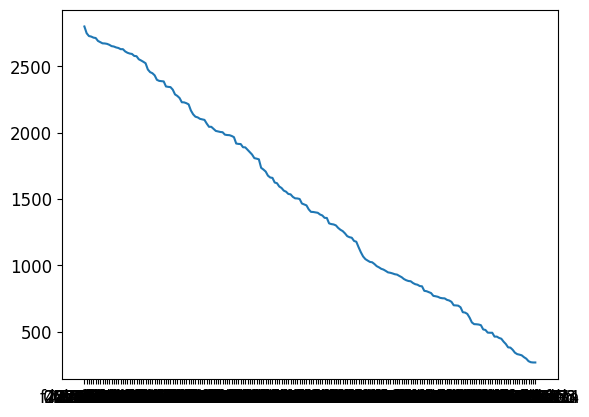

nom_6
d173ac7ca    1218
2ed5a94b0    1210
c9eedfbc2    1193
50d7ad46a    1175
0922e3cb8    1169
             ... 
f0c4b23ef     702
dee9cf5e9     693
a9925d0e5     691
1c34a67d7     690
ec416c384     689
Name: nom_6, Length: 200, dtype: int64


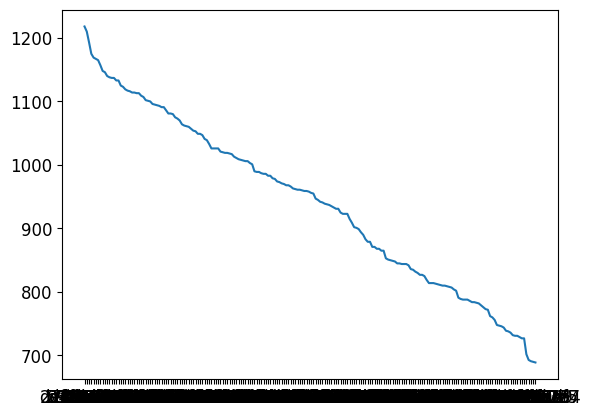

nom_7
3a114adea    534
6f3940b72    518
3b679e531    518
fcf2b8dce    517
fe27cc23d    515
            ... 
d96e5093d    411
80233d0ed    410
c1cbba46b    410
e2d4e02e1    410
8cae1caeb    409
Name: nom_7, Length: 200, dtype: int64


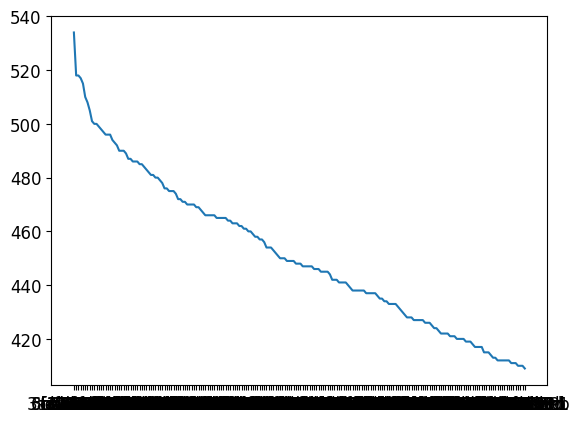

nom_8
c720f85ca    299
9ff6898e5    294
3cec7c3f5    292
d69adef8b    288
17ba84114    287
            ... 
235c5f246    246
b2daa8b10    246
ebc6cb63d    246
9177167a4    245
c42d909bf    245
Name: nom_8, Length: 200, dtype: int64


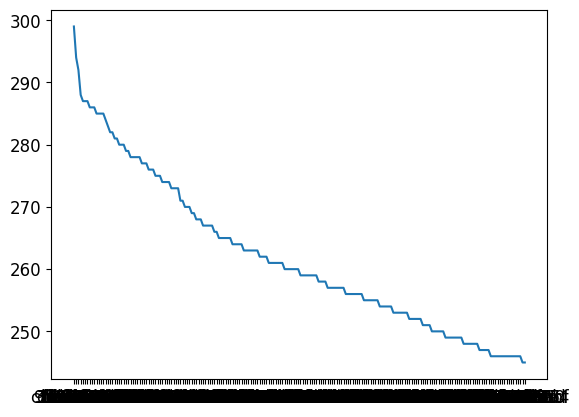

nom_9
163cc60fa    72
21578b358    70
e8be2364b    67
412859a59    67
f12f038cc    66
             ..
d637c0b08    55
948070168    55
8b81af6e4    55
54f58e361    55
11ca62cb0    55
Name: nom_9, Length: 200, dtype: int64


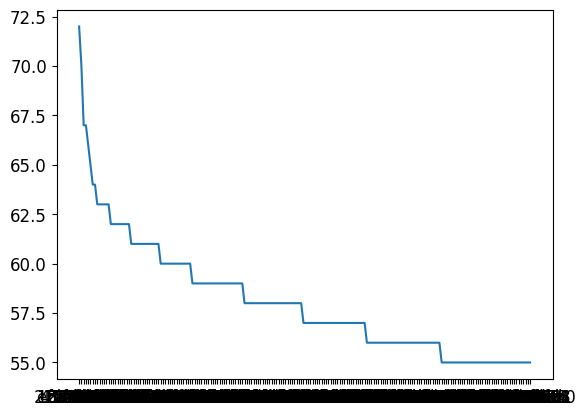

In [205]:
for feature in nom_features2:
#     df = train[feature]
    print(feature)
    fr = train[feature].value_counts()[:200]
    print(fr)
    plt.plot(fr)
#     sns.countplot(x=feature, data=train, order=tr.index)
    plt.show()

In [206]:
nom_features = ['nom_'+str(x) for x in range(10)]

In [207]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_nom_matrix = encoder.fit_transform(all_data[nom_features])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [208]:
all_data = all_data.drop(nom_features, axis=1)

### 날짜 피처 인코딩

In [209]:
date_features = ['day', 'month']

encoded_date_matrix = encoder.fit_transform(all_data[date_features])
all_data = all_data.drop(date_features, axis=1)

## 피처 엔지니어링 2 :피처 스케일링

### 순서형 피처 스케일링

In [210]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_'+str(x) for x in range(6)]

all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

### 인코딩 및 스케일링 된 피처 합치기

In [211]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data), encoded_nom_matrix, encoded_date_matrix], format='csr')
all_data_sprs.shape

(500000, 16306)

### 데이터 나누기

In [212]:
num_train = len(train)

X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

## 하이퍼파라미터 최적화
- [소스](https://www.kaggle.com/code/lifesailor/xgboost/notebook?scriptVersionId=9848041)

In [219]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

param_grid = {
 'max_depth':range(3,10,3),
 'min_child_weight':range(1,6,2), 
}
grid_xgb_model = GridSearchCV(estimator=xgb_model, 
                                  param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_xgb_model.fit(X_train, y)

print('최적의 파라미터 : ', grid_xgb_model.best_params_)

최적의 파라미터 :  {'max_depth': 6, 'min_child_weight': 3}


## 예측 및 결과 제출

In [220]:
y_preds = grid_xgb_model.best_estimator_.predict_proba(X_test)[:, 1]
submission['target'] = y_preds
submission.to_csv('submission_3.csv')

# 성능 개선 4
- 결과 : 0.7532

## 하이퍼파라미터 최적화
- [소스](https://www.kaggle.com/code/lifesailor/xgboost/notebook?scriptVersionId=9848041)

In [224]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

param_grid = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

grid_model = GridSearchCV(estimator=model, 
                                  param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_model.fit(X_train, y)

print('최적의 파라미터 : ', grid_model.best_params_)

최적의 파라미터 :  {'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 20, 'n_estimators': 100}


## 예측 및 결과 제출

In [225]:
y_preds = grid_model.best_estimator_.predict_proba(X_test)[:, 1]
submission['target'] = y_preds
submission.to_csv('submission_4.csv')